In [ ]:
Walmart Bussiness Case

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm 

Problem Statement:

            
            Given dataset consists of walmart company customer's data regarding transactions from stores in three cities on black friday. Analysis of the Purchase history against factors like customer's age gender marital status etc helps to identify the factors influencing customer's purchase behaviour. This information would help in making better business descisions for future growth of the company.

In [2]:
df=pd.read_csv('walmartdataset.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
df.shape

(550068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Mean purchase amount per transaction was 9264±5023 with a minimum purchase amount per transaction of 12 and a maximum of 23961.

Amount spent for 50% of the transactions was in between 5823 and 12054 with a median of 8047

In [46]:
df['Product_Category'].value_counts()

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

In [45]:
df['Product_Category'].value_counts(normalize=True)

Product_Category
5     0.274390
1     0.255201
8     0.207111
11    0.044153
2     0.043384
6     0.037206
3     0.036746
4     0.021366
16    0.017867
15    0.011435
13    0.010088
10    0.009317
12    0.007175
7     0.006765
18    0.005681
20    0.004636
19    0.002914
14    0.002769
17    0.001051
9     0.000745
Name: proportion, dtype: float64

More than 70% of the transactions are done on the Product categories 5(27.4%),1(25.5%) and 8(20.7%)

In [44]:
df.groupby('Product_Category')['Purchase'].sum().sort_values(ascending=False)

Product_Category
1     1910013754
5      941835229
8      854318799
6      324150302
2      268516186
3      204084713
16     145120612
11     113791115
10     100837301
15      92969042
7       60896731
4       27380488
14      20014696
18       9290201
9        6370324
17       5878699
12       5331844
13       4008601
20        944727
19         59378
Name: Purchase, dtype: int64

In [47]:
(df.groupby('Product_Category')['Purchase'].sum()/df.groupby('Product_Category')['Purchase'].sum().sum()).sort_values(ascending=False)

Product_Category
1     0.374820
5     0.184825
8     0.167651
6     0.063611
2     0.052693
3     0.040049
16    0.028478
11    0.022330
10    0.019788
15    0.018244
7     0.011950
4     0.005373
14    0.003928
18    0.001823
9     0.001250
17    0.001154
12    0.001046
13    0.000787
20    0.000185
19    0.000012
Name: Purchase, dtype: float64

37.5% of revenue was generated by product category 1

In [49]:
df['Occupation'].value_counts(normalize=True)

Occupation
4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: proportion, dtype: float64

In [51]:
(df.groupby('Occupation')['Purchase'].sum()/df.groupby('Occupation')['Purchase'].sum().sum()).sort_values(ascending=False)

Occupation
4     0.130744
0     0.124692
7     0.109378
1     0.083326
17    0.077177
12    0.059941
20    0.058199
14    0.050915
16    0.046773
2     0.046711
6     0.036975
3     0.031791
15    0.023345
10    0.022733
5     0.022303
11    0.020949
19    0.014463
13    0.014113
18    0.011916
9     0.010664
8     0.002892
Name: Purchase, dtype: float64

50% of transactions were done by customers belonging to occupations 4,0,7,1 and 17.

In [53]:
user=df.groupby(['User_ID','Gender','City_Category','Stay_In_Current_City_Years'])['Purchase'].sum().reset_index()
user

,User_ID,Gender,City_Category,Stay_In_Current_City_Years,Purchase
0,1000001,F,A,2,334093
1,1000002,M,C,4+,810472
2,1000003,M,A,3,341635
3,1000004,M,B,2,206468
4,1000005,M,A,1,821001
...,...,...,...,...,...
5886,1006036,F,B,4+,4116058
5887,1006037,F,C,4+,1119538
5888,1006038,F,C,2,90034
5889,1006039,F,B,4+,590319


5891 customers purchased different products on black friday

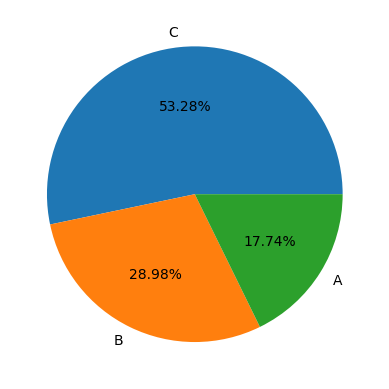

In [54]:
plt.pie(x=user['City_Category'].value_counts(),labels=user['City_Category'].value_counts().index,autopct='%0.2f%%')
plt.show()

More than 50% of customers belonged to city c

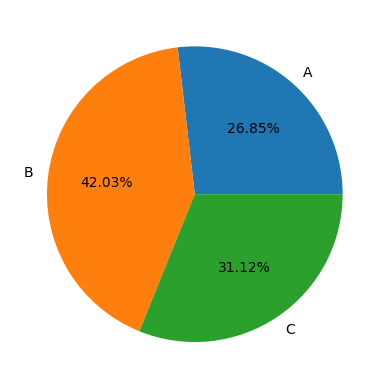

In [39]:
plt.pie(x=df.groupby(['City_Category'])['Purchase'].count(),labels=df.groupby(['City_Category'])['Purchase'].count().index,autopct='%0.2f%%')
plt.show()

42% of revenue was generated from city B out of three cities

In [40]:
data1=user.groupby(['City_Category','Stay_In_Current_City_Years'])['User_ID'].count().reset_index()
data1

,City_Category,Stay_In_Current_City_Years,User_ID
0,A,0,147
1,A,1,370
2,A,2,183
3,A,3,180
4,A,4+,165
5,B,0,211
6,B,1,608
7,B,2,342
8,B,3,295
9,B,4+,251


<Axes: xlabel='City_Category', ylabel='User_ID'>

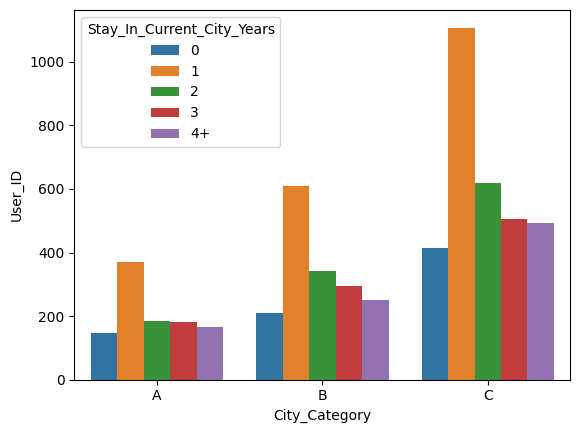

In [41]:
sns.barplot(data=data1,x='City_Category',y='User_ID',hue='Stay_In_Current_City_Years')

In [56]:
user['Gender'].value_counts(normalize=True)

Gender
M    0.717196
F    0.282804
Name: proportion, dtype: float64

72% of the customers were male

<Axes: xlabel='Gender', ylabel='Purchase'>

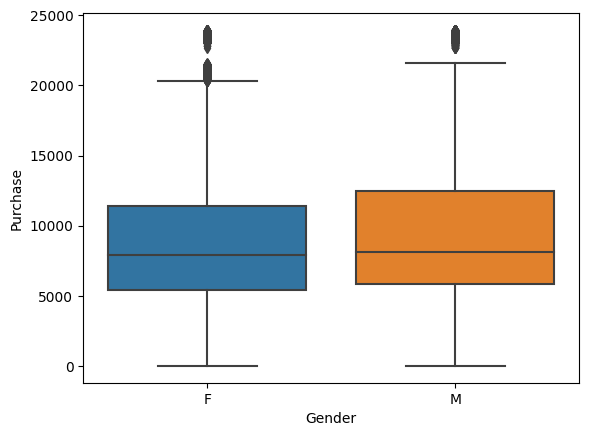

In [52]:
sns.boxplot(x=df['Gender'],y=df['Purchase'])

In [7]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


Mean amount spent by females and males per transaction are 8734.56±4767.23 and 9437.53±5092.18.

Amount spent for 50% transactions was in between 5433 and 11400 with median 7914 by female.

Amount spent for 50% transactions was in between 5863 and 12454 with median 8098 by males.

In [8]:
def func(x):
    return [np.mean(np.random.choice(x,10000)) for i in range(20000)]
gender_sample_means1=df.groupby('Gender')['Purchase'].apply(func)
gender_sample_means1

Gender
F    [8699.2075, 8738.7025, 8761.8001, 8735.5855, 8...
M    [9527.3487, 9442.3744, 9431.2759, 9429.1164, 9...
Name: Purchase, dtype: object

In [9]:
def func(x):
    return pd.Series(x).describe()
gender_sample_means1.apply(func)

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,20000.0,8734.833391,47.688685,8533.3067,8702.733200,8734.66460,8766.937800,8937.0812
M,20000.0,9437.533502,51.236367,9227.6589,9402.532475,9437.12985,9471.824175,9659.9212


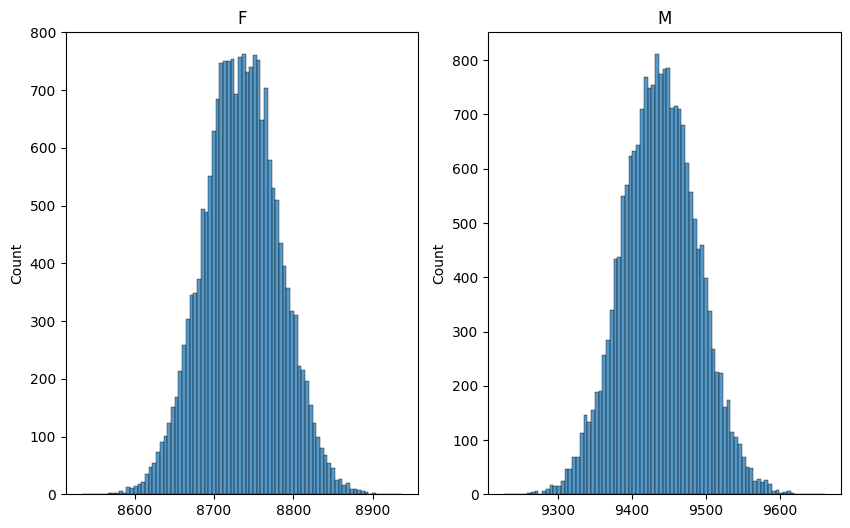

In [10]:
x=1
plt.figure(figsize=(10,6))
for i in gender_sample_means1.index:
    plt.subplot(1,2,x)
    plt.title(i)
    sns.histplot(x=gender_sample_means1.loc[i])
    x=x+1
plt.show()

The above graphs depict the distribution of 20000 sample means with a sample size of 10000 for males and females separately.

In [11]:
def func(x):
    return [np.mean(np.random.choice(x,30000)) for i in range(20000)]
gender_sample_means2=df.groupby('Gender')['Purchase'].apply(func)
gender_sample_means2

Gender
F    [8756.578733333334, 8748.348666666667, 8751.47...
M    [9474.0409, 9436.0775, 9420.785166666667, 9464...
Name: Purchase, dtype: object

In [12]:
def func(x):
    return pd.Series(x).describe()
gender_sample_means2.apply(func)

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,20000.0,8734.355158,27.292437,8619.970567,8715.976658,8734.36395,8752.570617,8863.350667
M,20000.0,9437.739993,29.357547,9326.965500,9418.225075,9437.82730,9457.408858,9550.262567


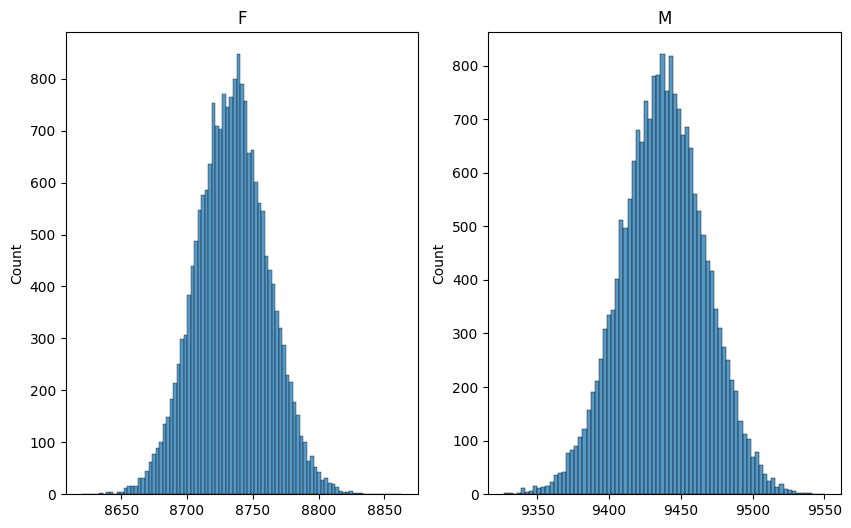

In [13]:
x=1
plt.figure(figsize=(10,6))
for i in gender_sample_means2.index:
    plt.subplot(1,2,x)
    plt.title(i)
    sns.histplot(x=gender_sample_means2.loc[i])
    x=x+1
plt.show()

The above graphs depict the distribution of 20000 sample means with a sample size of 30000 for males and females separately.

It is observed that as sample size increases, normal distribution curve narrows down. 

CONFIDENCE INTERVALS:
    
            Calculating confidence intervals by taking sample size value of 10000.

In [14]:
n=10000
gender_CIS=df.groupby('Gender')['Purchase'].aggregate(['mean','std'])
gender_CIS

,mean,std
Gender,,
F,8734.565765,4767.233289
M,9437.526040,5092.186210


population means for females and males were 8734.566±4767.233 and 9437.526±5092.186 respectively.

In [15]:
def func(x):
    z1=norm.ppf(0.05)
    z2=norm.ppf(0.95)
    return round(x['mean']+z1*(x['std']/np.sqrt(n)),2),round(x['mean']+z2*(x['std']/np.sqrt(n)),2)
gender_CIS['90%interval']=gender_CIS.apply(func,axis=1)
gender_CIS

,mean,std,90%interval
Gender,,,
F,8734.565765,4767.233289,"(8656.15, 8812.98)"
M,9437.526040,5092.186210,"(9353.77, 9521.29)"


with 90% confidence we can assume average amount spent by females and males per transaction will be in the range of (8656.15, 8812.98) and (9353.77, 9521.29) respectively.

There is no overlap in 90% confidence Interval between male and female average purchase amount per transaction.

In [16]:
def func(x):
    z1=norm.ppf(0.025)
    z2=norm.ppf(0.975)
    return round(x['mean']+z1*(x['std']/np.sqrt(n)),2),round(x['mean']+z2*(x['std']/np.sqrt(n)),2)
gender_CIS['95%interval']=gender_CIS.apply(func,axis=1)
gender_CIS

,mean,std,90%interval,95%interval
Gender,,,,
F,8734.565765,4767.233289,"(8656.15, 8812.98)","(8641.13, 8828.0)"
M,9437.526040,5092.186210,"(9353.77, 9521.29)","(9337.72, 9537.33)"


with 95% confidence we can assume average amount spent by females and males per transaction will be in the range of (8641.13, 8828.0) and (9337.72, 9537.33) respectively.

There is no overlap in 95% confidence Interval between male and female average purchase amount per transaction.

In [17]:
def func(x):
    z1=norm.ppf(0.005)
    z2=norm.ppf(0.995)
    return round(x['mean']+z1*(x['std']/np.sqrt(n)),2),round(x['mean']+z2*(x['std']/np.sqrt(n)),2)
gender_CIS['99%interval']=gender_CIS.apply(func,axis=1)
gender_CIS

,mean,std,90%interval,95%interval,99%interval
Gender,,,,,
F,8734.565765,4767.233289,"(8656.15, 8812.98)","(8641.13, 8828.0)","(8611.77, 8857.36)"
M,9437.526040,5092.186210,"(9353.77, 9521.29)","(9337.72, 9537.33)","(9306.36, 9568.69)"


with 99% confidence we can assume average amount spent by females and males per transaction will be in the range of (8611.77, 8857.36) and (9306.36, 9568.69) respectively.

There is no overlap in 99% confidence Interval between male and female average purchase amount per transaction.

In [18]:
def func(x):
    if x:
        return 'married'
    else:
        return 'unmarried'
df['MS']=df['Marital_Status'].apply(func)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,MS
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,unmarried
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,unmarried
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,unmarried
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,unmarried
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,unmarried
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368,married
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371,unmarried
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137,married
550066,1006038,P00375436,F,55+,1,C,2,0,20,365,unmarried


<Axes: xlabel='MS', ylabel='Purchase'>

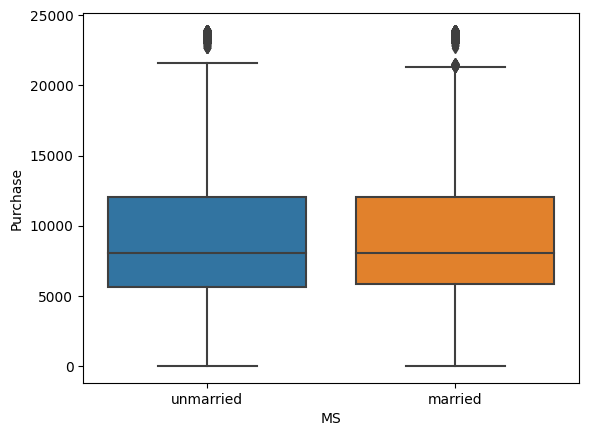

In [19]:
sns.boxplot(x=df['MS'],y=df['Purchase'])

In [20]:
df.groupby('MS')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
MS,,,,,,,,
married,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0
unmarried,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0


Mean amount spent by married and unmarried per transaction are 9261.17±5016.9 and 9265.9±5027.35.

Amount spent for 50% transactions was in between 5843 and 12042 with median 8051 by married customers.

Amount spent for 50% transactions was in between 5605 and 12061 with median 8044 by ummarried customers.

In [21]:
def func(x):
    return [np.mean(np.random.choice(x,10000)) for i in range(20000)]
MS_sample_means1=df.groupby('MS')['Purchase'].apply(func)
MS_sample_means1

MS
married      [9306.1614, 9267.9153, 9217.5352, 9201.7204, 9...
unmarried    [9215.6875, 9310.5581, 9239.5695, 9205.6234, 9...
Name: Purchase, dtype: object

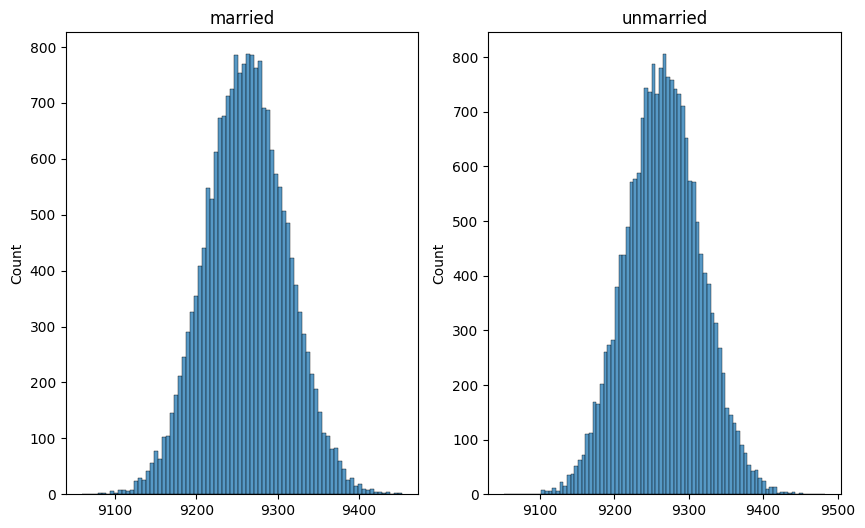

In [22]:
x=1
plt.figure(figsize=(10,6))
for i in MS_sample_means1.index:
    plt.subplot(1,2,x)
    plt.title(i)
    sns.histplot(x=MS_sample_means1.loc[i])
    x=x+1
plt.show()

The above graphs depict the distribution of 20000 sample means with a sample size of 10000 for married and unmarried customers separately.

In [23]:
def func(x):
    return pd.Series(x).describe()
MS_sample_means1.apply(func)

,count,mean,std,min,25%,50%,75%,max
MS,,,,,,,,
married,20000.0,9261.177655,49.888001,9058.6938,9227.376675,9261.09515,9294.802825,9452.9570
unmarried,20000.0,9266.030778,50.178890,9052.4131,9232.060075,9265.86315,9299.523050,9482.5875


CONFIDENCE INTERVALS:
    
            Calculating confidence intervals by taking sample size value of 10000.

In [24]:
n=10000
MS_CIS=df.groupby('MS')['Purchase'].aggregate(['mean','std'])
MS_CIS

,mean,std
MS,,
married,9261.174574,5016.897378
unmarried,9265.907619,5027.347859


population means for married and unmarried customers were 9261.17±5016.89 and 9265.90±5027.34 respectively.

In [25]:
def func(x):
    z1=norm.ppf(0.05)
    z2=norm.ppf(0.95)
    return round(x['mean']+z1*(x['std']/np.sqrt(n)),2),round(x['mean']+z2*(x['std']/np.sqrt(n)),2)
MS_CIS['90%interval']=MS_CIS.apply(func,axis=1)
MS_CIS

,mean,std,90%interval
MS,,,
married,9261.174574,5016.897378,"(9178.65, 9343.7)"
unmarried,9265.907619,5027.347859,"(9183.22, 9348.6)"


With 90% confidence we can assume average amount spent by married and unmarried customers per transaction will be in the range of (9178.65, 9343.7) and (9183.22, 9348.6) respectively.

There is overlap in 90% confidence Interval between married and unmarried customers average purchase amount per transaction.

In [26]:
def func(x):
    z1=norm.ppf(0.025)
    z2=norm.ppf(0.975)
    return round(x['mean']+z1*(x['std']/np.sqrt(n)),2),round(x['mean']+z2*(x['std']/np.sqrt(n)),2)
MS_CIS['95%interval']=MS_CIS.apply(func,axis=1)
MS_CIS

,mean,std,90%interval,95%interval
MS,,,,
married,9261.174574,5016.897378,"(9178.65, 9343.7)","(9162.85, 9359.5)"
unmarried,9265.907619,5027.347859,"(9183.22, 9348.6)","(9167.37, 9364.44)"


With 95% confidence we can assume average amount spent by married and unmarried customers per transaction will be in the range of (9162.85, 9359.5) and (9167.37, 9364.44) respectively.

There is overlap in 95% confidence Interval between married and unmarried customers average purchase amount per transaction.

In [27]:
def func(x):
    z1=norm.ppf(0.005)
    z2=norm.ppf(0.995)
    return round(x['mean']+z1*(x['std']/np.sqrt(n)),2),round(x['mean']+z2*(x['std']/np.sqrt(n)),2)
MS_CIS['99%interval']=MS_CIS.apply(func,axis=1)
MS_CIS

,mean,std,90%interval,95%interval,99%interval
MS,,,,,
married,9261.174574,5016.897378,"(9178.65, 9343.7)","(9162.85, 9359.5)","(9131.95, 9390.4)"
unmarried,9265.907619,5027.347859,"(9183.22, 9348.6)","(9167.37, 9364.44)","(9136.41, 9395.4)"


With 99% confidence we can assume average amount spent by married and unmarried customers per transaction will be in the range of ((9131.95, 9390.4) and (9136.41, 9395.4) respectively.

There is overlap in 99% confidence Interval between married and unmarried customers average purchase amount per transaction.

<Axes: xlabel='Age', ylabel='Purchase'>

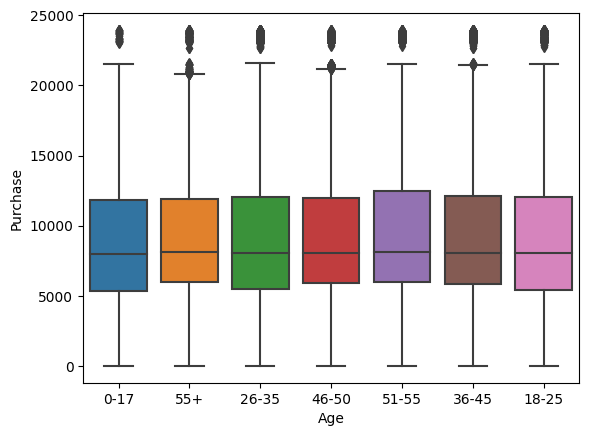

In [57]:
sns.boxplot(x=df['Age'],y=df['Purchase'])

In [28]:
df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


Mean amount spent by 0-17,18-25,26-35,36-45,46-50,51-55 and above 55 age groups per transaction are 8933.46±5111.11, 9169.66±5034.32, 9252.69±5010.52, 9331.35±5022.92, 9208.62±4967.21, 9534.80±5087.36 and 9336.28±5011.49 respectively.

Amount spent for 50% transactions was in between 5328 and 11874 with median 7986 by 0-17 age group.

Amount spent for 50% transactions was in between 5415 and 12028 with median 8027 by 18-25 age group.

Amount spent for 50% transactions was in between 5475 and 12047 with median 8030 by 26-35 age group.

Amount spent for 50% transactions was in between 5876 and 12107 with median 8061 by 36-45 age group.

Amount spent for 50% transactions was in between 5888 and 11997 with median 8036 by 46-50 age group.

Amount spent for 50% transactions was in between 6017 and 12462 with median 8130 by 51-55 age group.

Amount spent for 50% transactions was in between 6018 and 11932 with median 8105 by above 55 age group.

In [29]:
def func(x):
    return [np.mean(np.random.choice(x,10000)) for i in range(20000)]
age_sample_means1=df.groupby('Age')['Purchase'].apply(func)
age_sample_means1

Age
0-17     [8936.6783, 8911.4937, 8947.0365, 8993.0947, 9...
18-25    [9103.0231, 9166.5005, 9179.6159, 9174.2918, 9...
26-35    [9236.7882, 9239.4657, 9259.439, 9369.7026, 91...
36-45    [9378.1273, 9287.8412, 9288.5121, 9380.2295, 9...
46-50    [9153.0718, 9201.9342, 9286.0048, 9113.9557, 9...
51-55    [9590.47, 9475.8688, 9528.774, 9486.2894, 9535...
55+      [9268.1735, 9316.6638, 9264.8135, 9264.7009, 9...
Name: Purchase, dtype: object

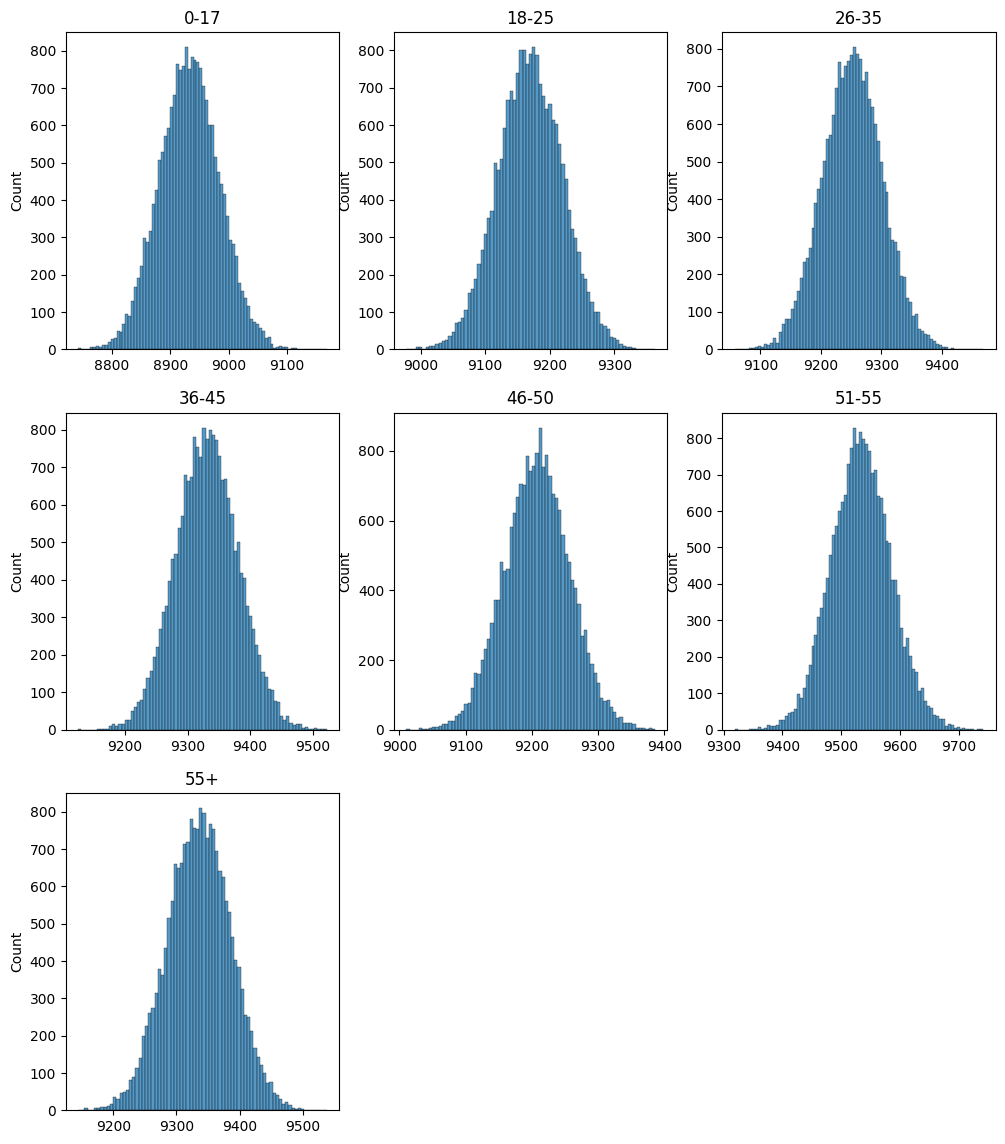

In [30]:
x=1
plt.figure(figsize=(12,14))
for i in age_sample_means1.index:
    plt.subplot(3,3,x)
    plt.title(i)
    sns.histplot(x=age_sample_means1.loc[i])
    x=x+1
plt.show()

In [31]:
def func(x):
    return pd.Series(x).describe()
age_sample_means1.apply(func)

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,20000.0,8933.039829,51.349698,8741.6979,8898.293650,8933.01255,8967.589575,9168.5888
18-25,20000.0,9169.592509,50.238017,8978.0307,9135.805850,9169.42960,9204.056025,9362.7270
26-35,20000.0,9252.253785,49.618171,9057.2313,9219.115500,9252.55375,9285.696275,9468.1675
36-45,20000.0,9331.291104,49.993154,9125.0302,9297.402425,9331.11955,9364.920950,9522.3814
46-50,20000.0,9207.806312,49.524794,9010.4422,9174.671600,9208.21690,9240.927450,9385.8942
51-55,20000.0,9534.113265,51.264681,9318.7822,9499.652550,9533.67470,9568.240925,9741.4430
55+,20000.0,9336.019835,50.498627,9144.3701,9301.617625,9336.48320,9370.444525,9537.7660


CONFIDENCE INTERVALS:
    
            Calculating confidence intervals by taking sample size value of 10000.

In [32]:
n=10000
age_CIS=df.groupby('Age')['Purchase'].aggregate(['mean','std'])
age_CIS

,mean,std
Age,,
0-17,8933.464640,5111.114046
18-25,9169.663606,5034.321997
26-35,9252.690633,5010.527303
36-45,9331.350695,5022.923879
46-50,9208.625697,4967.216367
51-55,9534.808031,5087.368080
55+,9336.280459,5011.493996


population means for 0-17,18-25,26-35,36-45,46-50,51-55 and above 55 age group customers were 8933.46±5111.11, 9169.66±5034.32, 9252.69±5010.52, 9331.35±5022.92, 9208.62±4967.21, 9534.80±5087.36 and 9336.28±5011.49 respectively.

In [33]:
def func(x):
    z1=norm.ppf(0.05)
    z2=norm.ppf(0.95)
    return round(x['mean']+z1*(x['std']/np.sqrt(n)),2),round(x['mean']+z2*(x['std']/np.sqrt(n)),2)
age_CIS['90%interval']=age_CIS.apply(func,axis=1)
age_CIS

,mean,std,90%interval
Age,,,
0-17,8933.464640,5111.114046,"(8849.39, 9017.53)"
18-25,9169.663606,5034.321997,"(9086.86, 9252.47)"
26-35,9252.690633,5010.527303,"(9170.27, 9335.11)"
36-45,9331.350695,5022.923879,"(9248.73, 9413.97)"
46-50,9208.625697,4967.216367,"(9126.92, 9290.33)"
51-55,9534.808031,5087.368080,"(9451.13, 9618.49)"
55+,9336.280459,5011.493996,"(9253.85, 9418.71)"


With 90% confidence we can assume average amount spent by 0-17,18-25,26-35,36-45,46-50,51-55 and above 55 age group customers per transaction will be in the range of (8849.39, 9017.53), (9086.86, 9252.47), (9170.27, 9335.11), (9248.73, 9413.97), (9126.92, 9290.33), (9451.13, 9618.49) and (9253.85, 9418.71) respectively.


There is no overlap in 90% confidence interval for 0-17 age group customers and 51-55 age group customers with other age group customers.

In [34]:
def func(x):
    z1=norm.ppf(0.025)
    z2=norm.ppf(0.975)
    return round(x['mean']+z1*(x['std']/np.sqrt(n)),2),round(x['mean']+z2*(x['std']/np.sqrt(n)),2)
age_CIS['95%interval']=age_CIS.apply(func,axis=1)
age_CIS

,mean,std,90%interval,95%interval
Age,,,,
0-17,8933.464640,5111.114046,"(8849.39, 9017.53)","(8833.29, 9033.64)"
18-25,9169.663606,5034.321997,"(9086.86, 9252.47)","(9070.99, 9268.33)"
26-35,9252.690633,5010.527303,"(9170.27, 9335.11)","(9154.49, 9350.9)"
36-45,9331.350695,5022.923879,"(9248.73, 9413.97)","(9232.9, 9429.8)"
46-50,9208.625697,4967.216367,"(9126.92, 9290.33)","(9111.27, 9305.98)"
51-55,9534.808031,5087.368080,"(9451.13, 9618.49)","(9435.1, 9634.52)"
55+,9336.280459,5011.493996,"(9253.85, 9418.71)","(9238.06, 9434.5)"


With 95% confidence we can assume average amount spent by 0-17,18-25,26-35,36-45,46-50,51-55 and above 55 age group customers per transaction will be in the range of (8833.29, 9033.64), (9070.99, 9268.33), (9154.49, 9350.9), (9232.9, 9429.8), (9111.27, 9305.98), (9435.1, 9634.52) and (9238.06, 9434.5) respectively.

There is no overlap in 95% confidence interval for 0-17 age group customers and 51-55 age group customers with other age group customers.

In [35]:
def func(x):
    z1=norm.ppf(0.005)
    z2=norm.ppf(0.995)
    return round(x['mean']+z1*(x['std']/np.sqrt(n)),2),round(x['mean']+z2*(x['std']/np.sqrt(n)),2)
age_CIS['99%interval']=age_CIS.apply(func,axis=1)
age_CIS

,mean,std,90%interval,95%interval,99%interval
Age,,,,,
0-17,8933.464640,5111.114046,"(8849.39, 9017.53)","(8833.29, 9033.64)","(8801.81, 9065.12)"
18-25,9169.663606,5034.321997,"(9086.86, 9252.47)","(9070.99, 9268.33)","(9039.99, 9299.34)"
26-35,9252.690633,5010.527303,"(9170.27, 9335.11)","(9154.49, 9350.9)","(9123.63, 9381.75)"
36-45,9331.350695,5022.923879,"(9248.73, 9413.97)","(9232.9, 9429.8)","(9201.97, 9460.73)"
46-50,9208.625697,4967.216367,"(9126.92, 9290.33)","(9111.27, 9305.98)","(9080.68, 9336.57)"
51-55,9534.808031,5087.368080,"(9451.13, 9618.49)","(9435.1, 9634.52)","(9403.77, 9665.85)"
55+,9336.280459,5011.493996,"(9253.85, 9418.71)","(9238.06, 9434.5)","(9207.19, 9465.37)"


With 99% confidence we can assume average amount spent by 0-17,18-25,26-35,36-45,46-50,51-55 and above 55 age group customers per transaction will be in the range of (8801.81, 9065.12), (9039.99, 9299.34), (9123.63, 9381.75), (9201.97, 9460.73),  (9080.68, 9336.57), (9403.77, 9665.85) and (9207.19, 9465.37) respectively.

There is overlap in 99% confidence interval for all age group customers.

Business Insights:
    
    
    1) Average amount spent per transaction was high for male than female customers.
    
    2) There was not much difference in the average purchase amount per transaction based on marital status.
    
    3) Age group wise also there was not much difference in the average purchase amount per transaction.
    
    4) City C has more customers compared to other cities.
    
    5) More transactions were done in City B compared to others.
    
    6) Product category 1 had 25% of transactions generating 37% of revenue.
    
    7) Product category 5 had 27% of transactions generating 18% revenue.
    
    8) Half of the transactions were done by customers belonging to occupations 4,0,7,1 and 17.

Recomendations:
    
    
    1) As average amount spent per transaction by females was less and there were less female customers also, necessary business measures should be taken to get more female customers.
    
    2) As age doesn't seem to affect the average amount spent per transaction, different range of products suitable to all age groups should be made available at the stores.
    
    3) As city C has more customers compared to other cities, special focus should be given to increase the number of transactions from that city.
    
    4) As city B has more transactions compared to other cities, special focus shoul be given to increase the customers from that city.
    
    5) As product category 1 is generating high revenue with reasonably high number of transactions apply strategies to increase the transactions of that category which results in more revenue.